In [2]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from eda.eda import *
# from lr_model.build_lr import *

# 1) Read all datafile and merge to one consolidated file.

In [3]:
# NOTE: Year = year for analysis; create: False(read merged file created before)/True(create a merged file)
# Returns df_merged with selected columns from each file
df_merged = consolidate_data(year=2019, create=False)

# 2) Create Regression Model

In [17]:
cols = list(df_merged.columns)
cols = cols[2:4]  + cols[7:8] + cols[10:11] + cols[14:18] + cols[27:30] + cols[38:41] + cols[42:43] + cols[44:47] 
df = df_merged[cols] 

In [14]:
df_merged.to_csv('~/Downloads/test.csv')
df_merged.SalePrice.max()
df_merged.DistrictName.unique()
df_merged.columns

Index(['Merged_Key', 'DocumentDate', 'SalePrice', 'PropertyType',
       'PrincipalUse', 'PropertyClass', 'PropType', 'Area', 'SubArea',
       'DistrictName', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'SeattleSkyline', 'LakeWashington', 'LakeSammamish',
       'SmallLakeRiverCreek', 'OtherView', 'WfntLocation', 'WfntFootage',
       'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
       'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
       'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances',
       'BldgNbr', 'NbrLivingUnits', 'Address', 'BuildingNumber', 'ZipCode',
       'Stories', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'HeatSystem', 'Bedrooms', 'BathHalfCount', 'Bath3qtrCount',
       'BathFullCo

In [ ]:
#       1 'Merged_Key', 'DocumentDate', 'SalePrice', 'PropertyType',
#       4 'PrincipalUse', 'PropertyClass', 'PropType', 'Area', 'SubArea',
#       9 'DistrictName', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
#      14 'SeattleSkyline', 'LakeWashington', 'LakeSammamish',
#      17 'SmallLakeRiverCreek', 'OtherView', 'WfntLocation', 'WfntFootage',
#      21 'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
#      24  'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
#        'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances',
#        'BldgNbr', 'NbrLivingUnits', 'Address', 'BuildingNumber', 'ZipCode',
#        'Stories', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
#        'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
#        'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageAttached',
#        'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
#        'HeatSystem', 'Bedrooms', 'BathHalfCount', 'Bath3qtrCount',
#        'BathFullCount', 'FpSingleStory', 'FpMultiStory', 'YrRenovated',
#        'PcntComplete'],

,SalePrice,PropertyType,Area,SqFtLot,SeattleSkyline,LakeWashington,LakeSammamish,SmallLakeRiverCreek,TrafficNoise,AirportNoise,PowerLines,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinHalf,SqFtTotBasement,SqFtFinBasement,SqFtGarageAttached
0,560000,3,70.0,10523,0,0,0,0,0,0,N,0,0,0,0,0,0,550
1,435000,11,56.0,7392,0,0,0,0,0,0,N,0,918,0,0,0,0,465
2,775000,11,39.0,7102,0,0,0,0,0,0,N,0,0,0,0,1040,1040,0
3,648500,11,56.0,5250,0,0,0,0,0,0,N,0,1910,0,0,0,0,590
4,550000,3,82.0,2500,0,0,0,0,0,0,N,0,540,650,0,0,0,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30194,850000,11,49.0,15770,0,0,0,0,0,0,N,0,1264,0,0,486,486,480
30195,650000,11,70.0,15634,0,0,0,0,0,0,N,0,1100,0,0,0,0,590
30196,540000,3,2.0,9568,0,0,0,0,0,0,N,0,0,0,0,0,0,0
30197,3900,1,3.0,7221,0,0,0,0,3,0,N,300,0,0,0,0,0,240


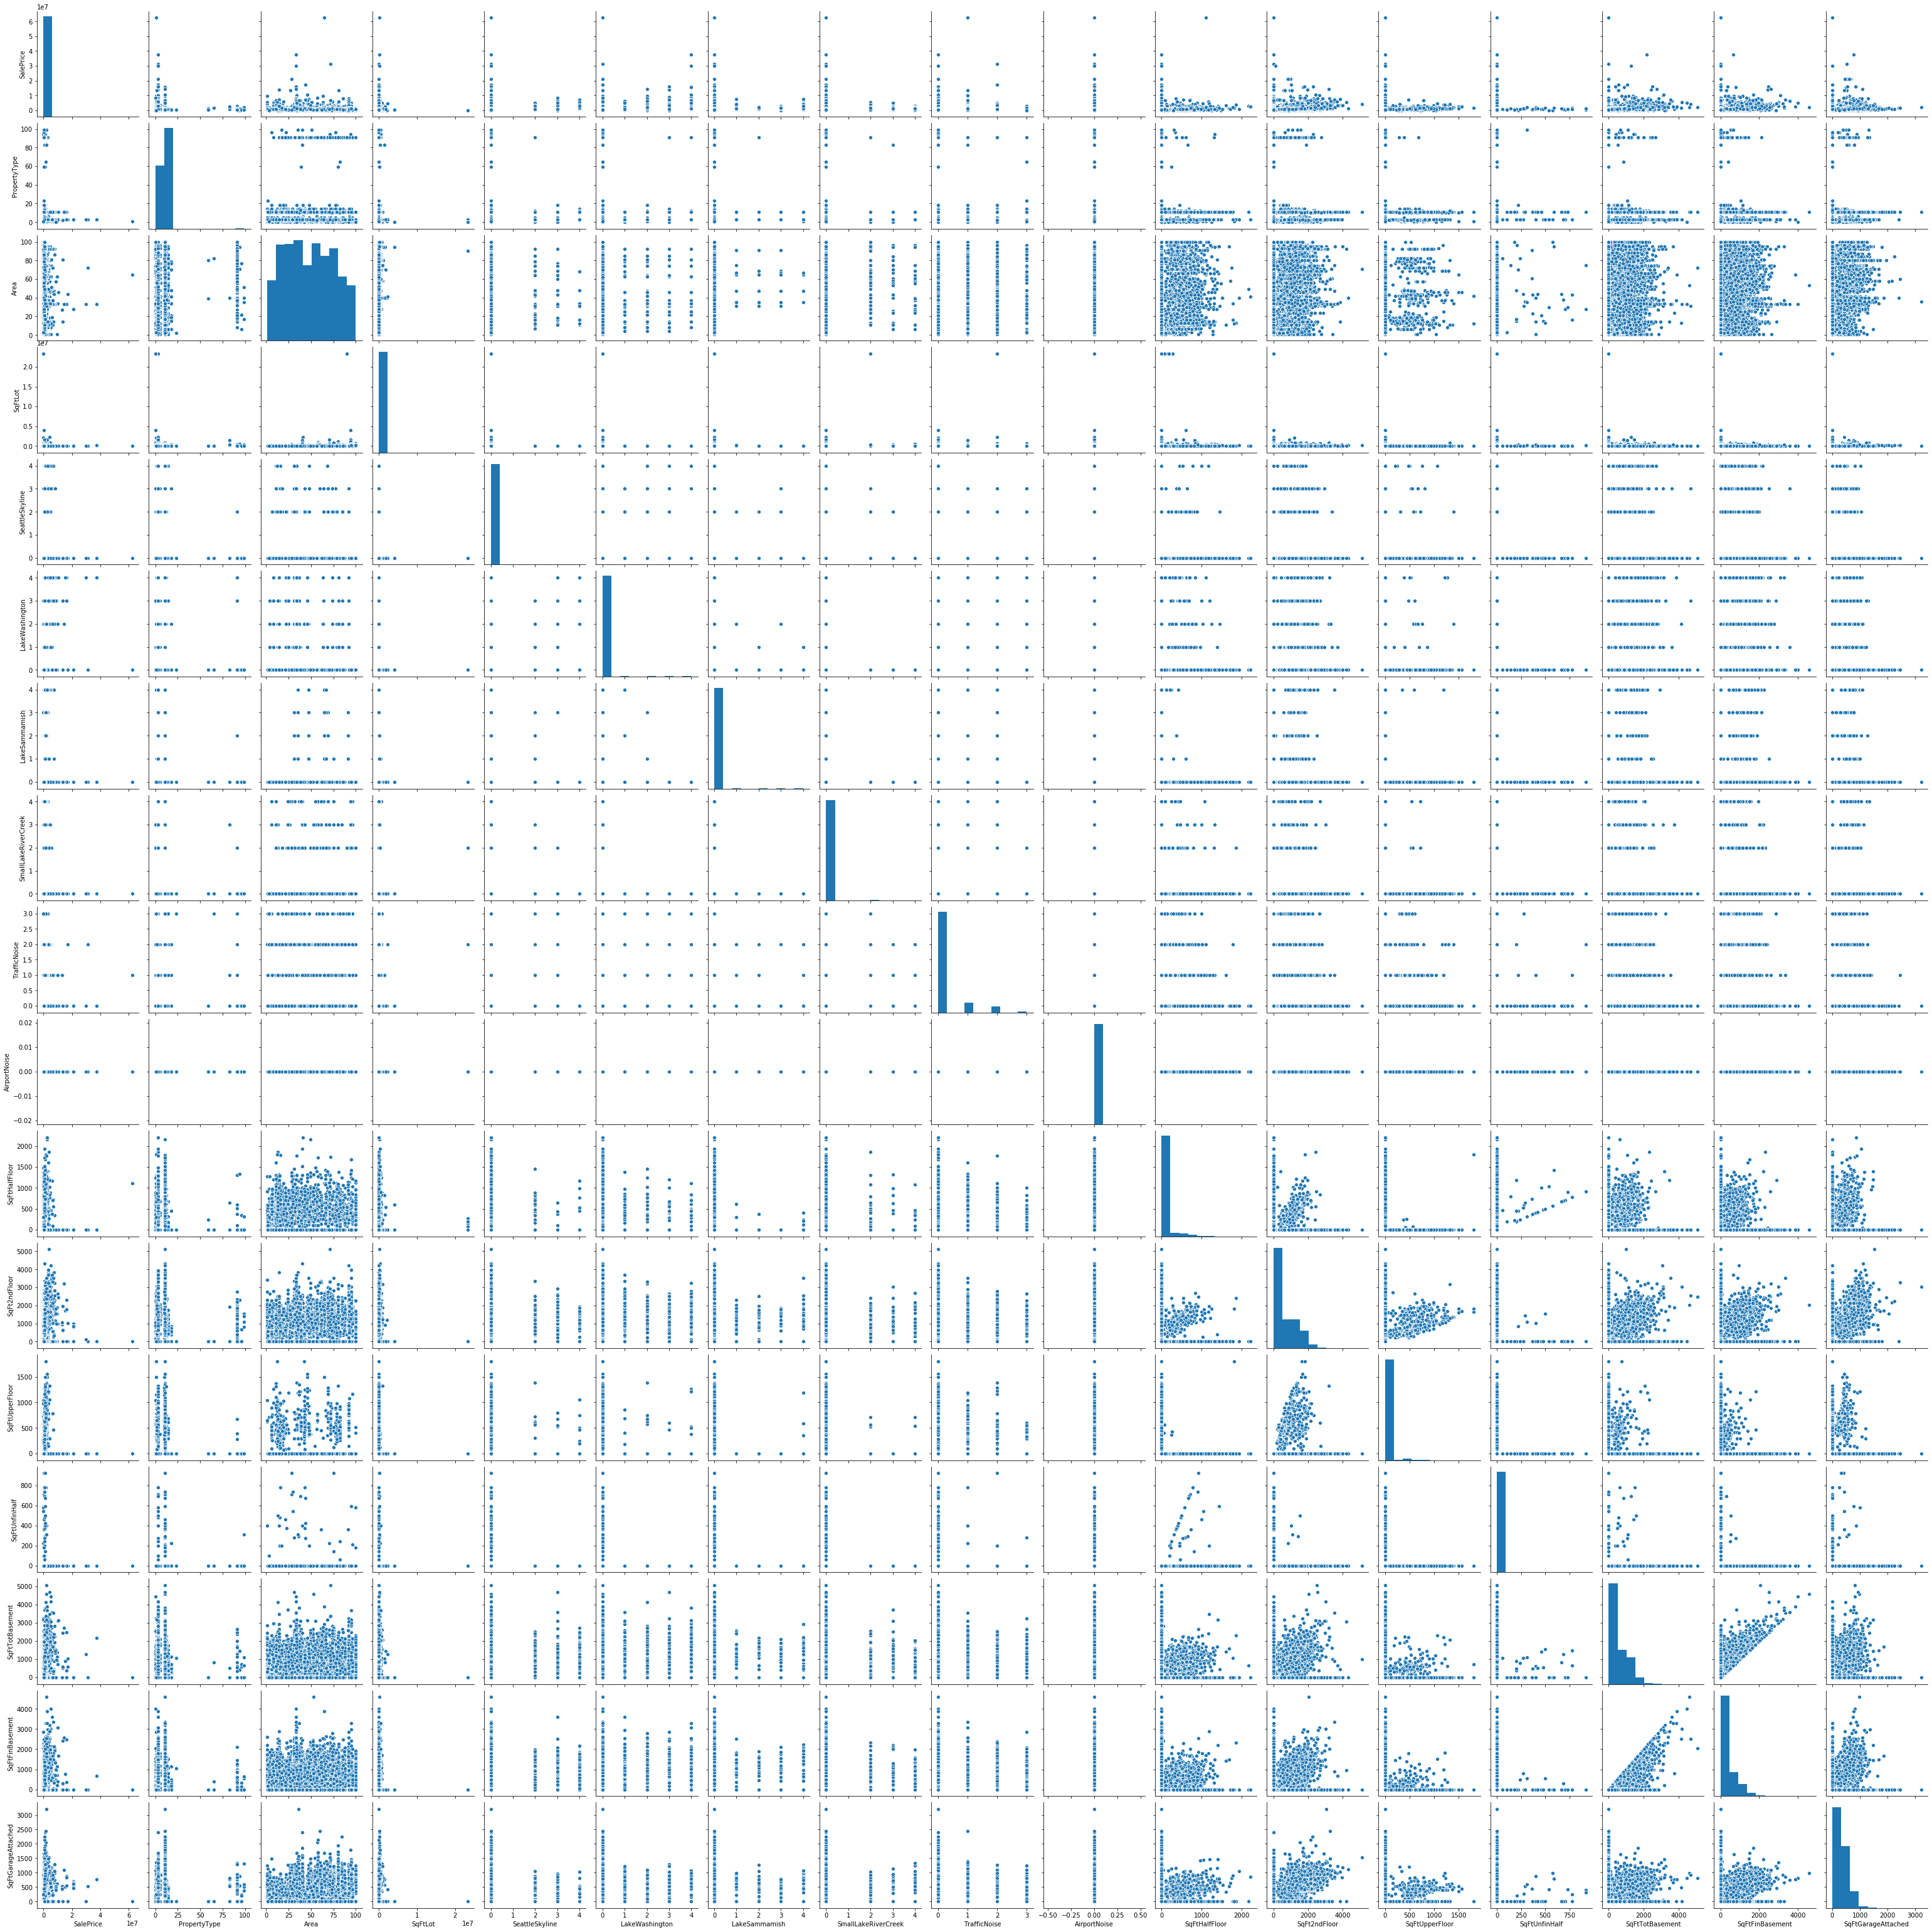

In [18]:
df.corr()
sns.pairplot(df);
df

In [19]:
df.columns

Index(['SalePrice', 'PropertyType', 'Area', 'SqFtLot', 'SeattleSkyline',
       'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek',
       'TrafficNoise', 'AirportNoise', 'PowerLines', 'SqFtHalfFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinHalf', 'SqFtTotBasement',
       'SqFtFinBasement', 'SqFtGarageAttached'],
      dtype='object')

In [ ]:
Y = df['SalePrice']
X = df[['','Condition','Material','Security','Type']]